# 13. financial forcasting

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df = pd.read_csv("C://Users//DELL//Downloads//DATASET END TO END WORKOUT//dataset//african_crises.csv")

In [4]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [13]:
unique_countries=df.country.unique()
unique_countries

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 115.9+ KB


In [21]:
# Data shape 
print(df.shape)

(1059, 14)


In [22]:
# Get column names
df.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [48]:
temp= df [(df["case"] == 1) & (df["cc3"] == 'DZA') & (df['banking_crisis']=='crisis')]
temp.head(5)
#if you want to write in SQL the above code, you shuld write as follows.
#select top 5 * from african_crises ac where ac.case=1 and ac.cc3='DZA' and ac.banking_crisis='crisis'

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.00,3.441456,0,0,0,crisis
60,1,DZA,Algeria,1990,1,12.190800,0,0,0.00,9.272000,1,1,0,crisis
61,1,DZA,Algeria,1991,1,21.391900,0,1,0.23,25.900000,1,1,1,crisis
62,1,DZA,Algeria,1992,1,22.781400,0,1,0.23,31.700000,1,0,1,crisis


In [49]:
temp= df [(df["systemic_crisis"] == 0) & (df['banking_crisis']=='crisis')]
temp.head(50)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
139,2,AGO,Angola,1992,0,5.500000e-07,1,1,0.00,299.097000,1,1,1,crisis
140,2,AGO,Angola,1993,0,6.500000e-06,1,1,0.00,1379.476000,1,1,1,crisis
141,2,AGO,Angola,1994,0,5.092620e-04,1,1,0.00,949.771000,1,1,1,crisis
142,2,AGO,Angola,1995,0,5.692000e-03,1,1,0.00,2672.230000,1,2,1,crisis
143,2,AGO,Angola,1996,0,2.019940e-01,1,1,0.00,4146.010000,1,1,1,crisis
144,2,AGO,Angola,1997,0,2.623760e-01,1,1,0.00,221.492000,1,1,1,crisis
145,2,AGO,Angola,1998,0,6.965000e-01,1,1,0.00,107.429000,1,1,1,crisis
413,19,EGY,Egypt,1990,0,2.000000e+00,0,0,0.00,21.219000,1,1,1,crisis
414,19,EGY,Egypt,1991,0,3.332210e+00,0,0,0.00,14.737000,1,1,0,crisis
415,19,EGY,Egypt,1992,0,3.338610e+00,0,0,0.00,21.142000,1,0,1,crisis


In [50]:
count_list_=[]
count_list = len(df.country)
#count_list_.append(count_list)
count_list

1059

In [51]:
country_list = list(df['country'].unique())
country_list

['Algeria',
 'Angola',
 'Central African Republic',
 'Ivory Coast',
 'Egypt',
 'Kenya',
 'Mauritius',
 'Morocco',
 'Nigeria',
 'South Africa',
 'Tunisia',
 'Zambia',
 'Zimbabwe']

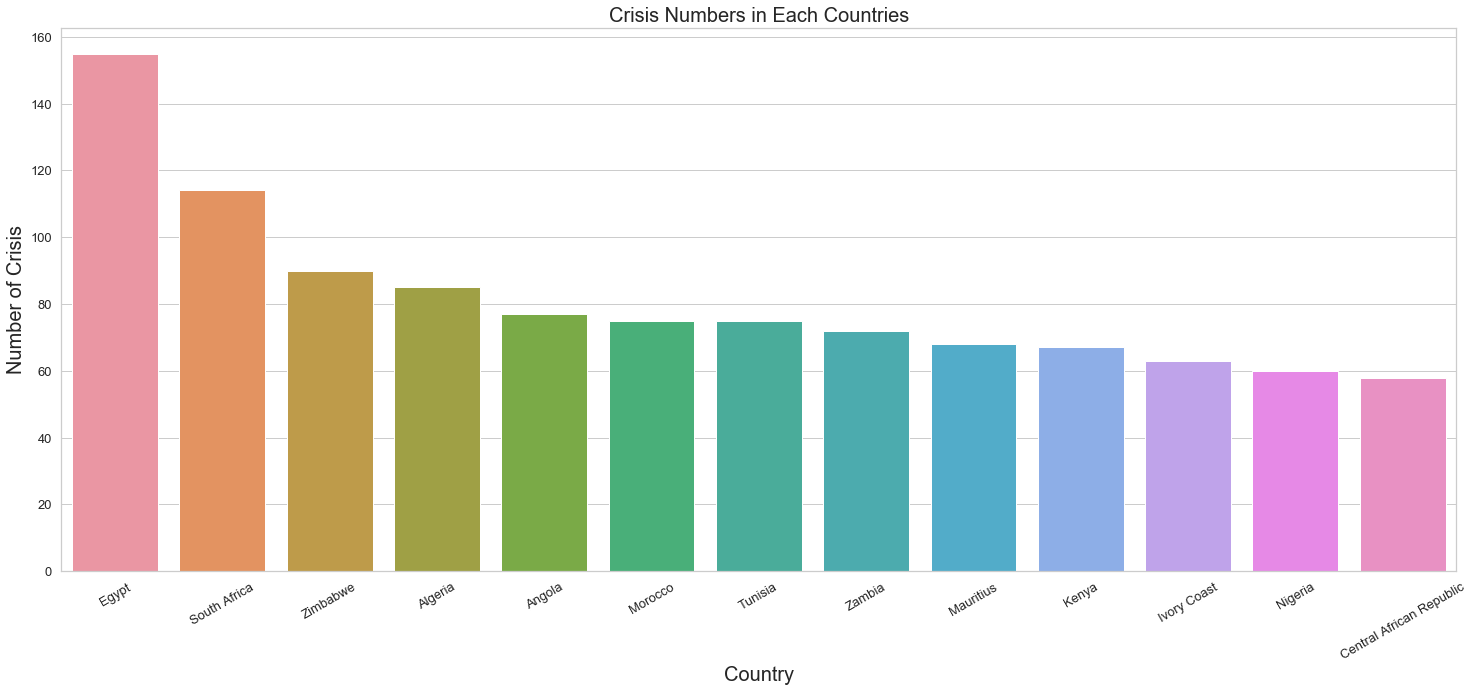

In [52]:
# Plotting a bar graph of the crisis number in each country
# in the column 'country'
country_count  = df['country'].value_counts()
country_count = country_count[:15,]
plt.figure(figsize=(25,10))
sns.barplot(country_count.index, country_count.values, alpha=1)
plt.xticks(rotation= 30,fontsize=13)
plt.yticks(rotation= 0,fontsize=13)
plt.title('Crisis Numbers in Each Countries',fontsize=20)
plt.ylabel('Number of Crisis', fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.show() 

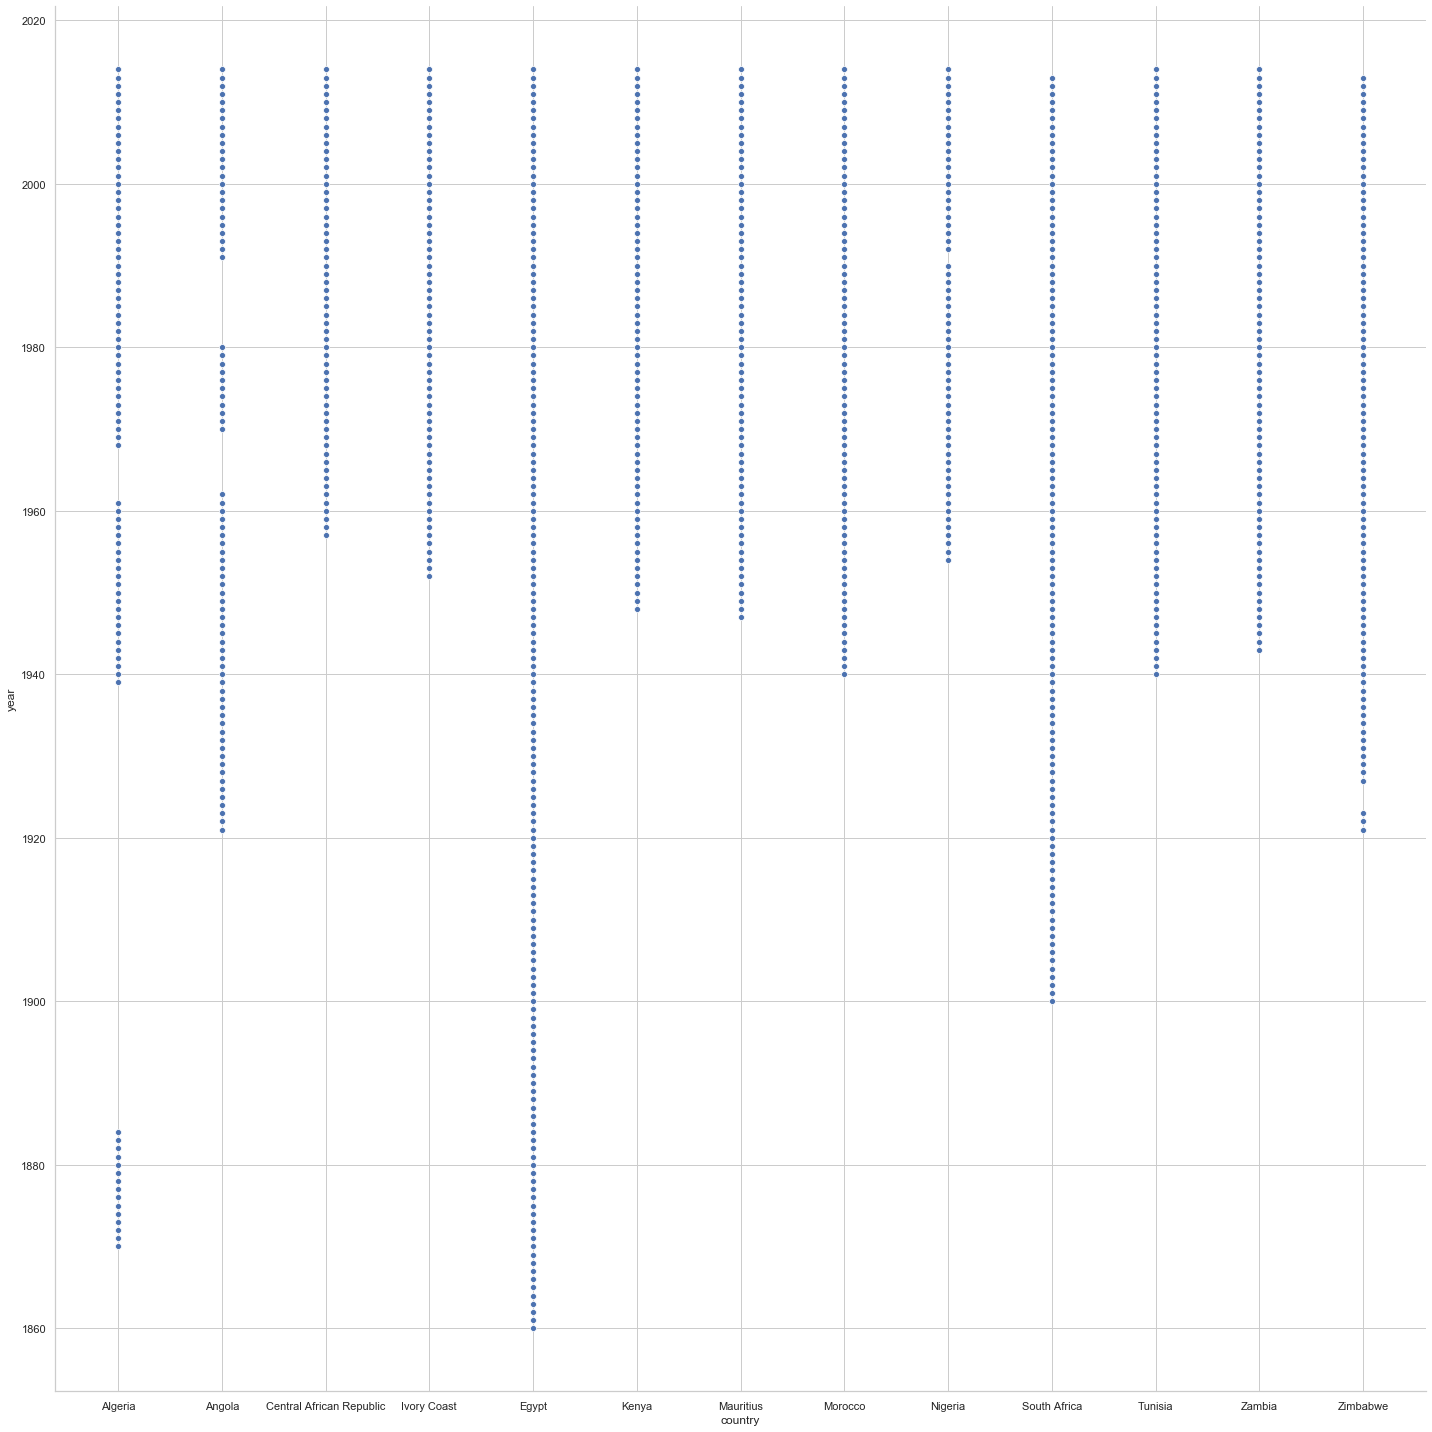

In [53]:
sns.relplot(x="country",y="year",data=df,height=20)

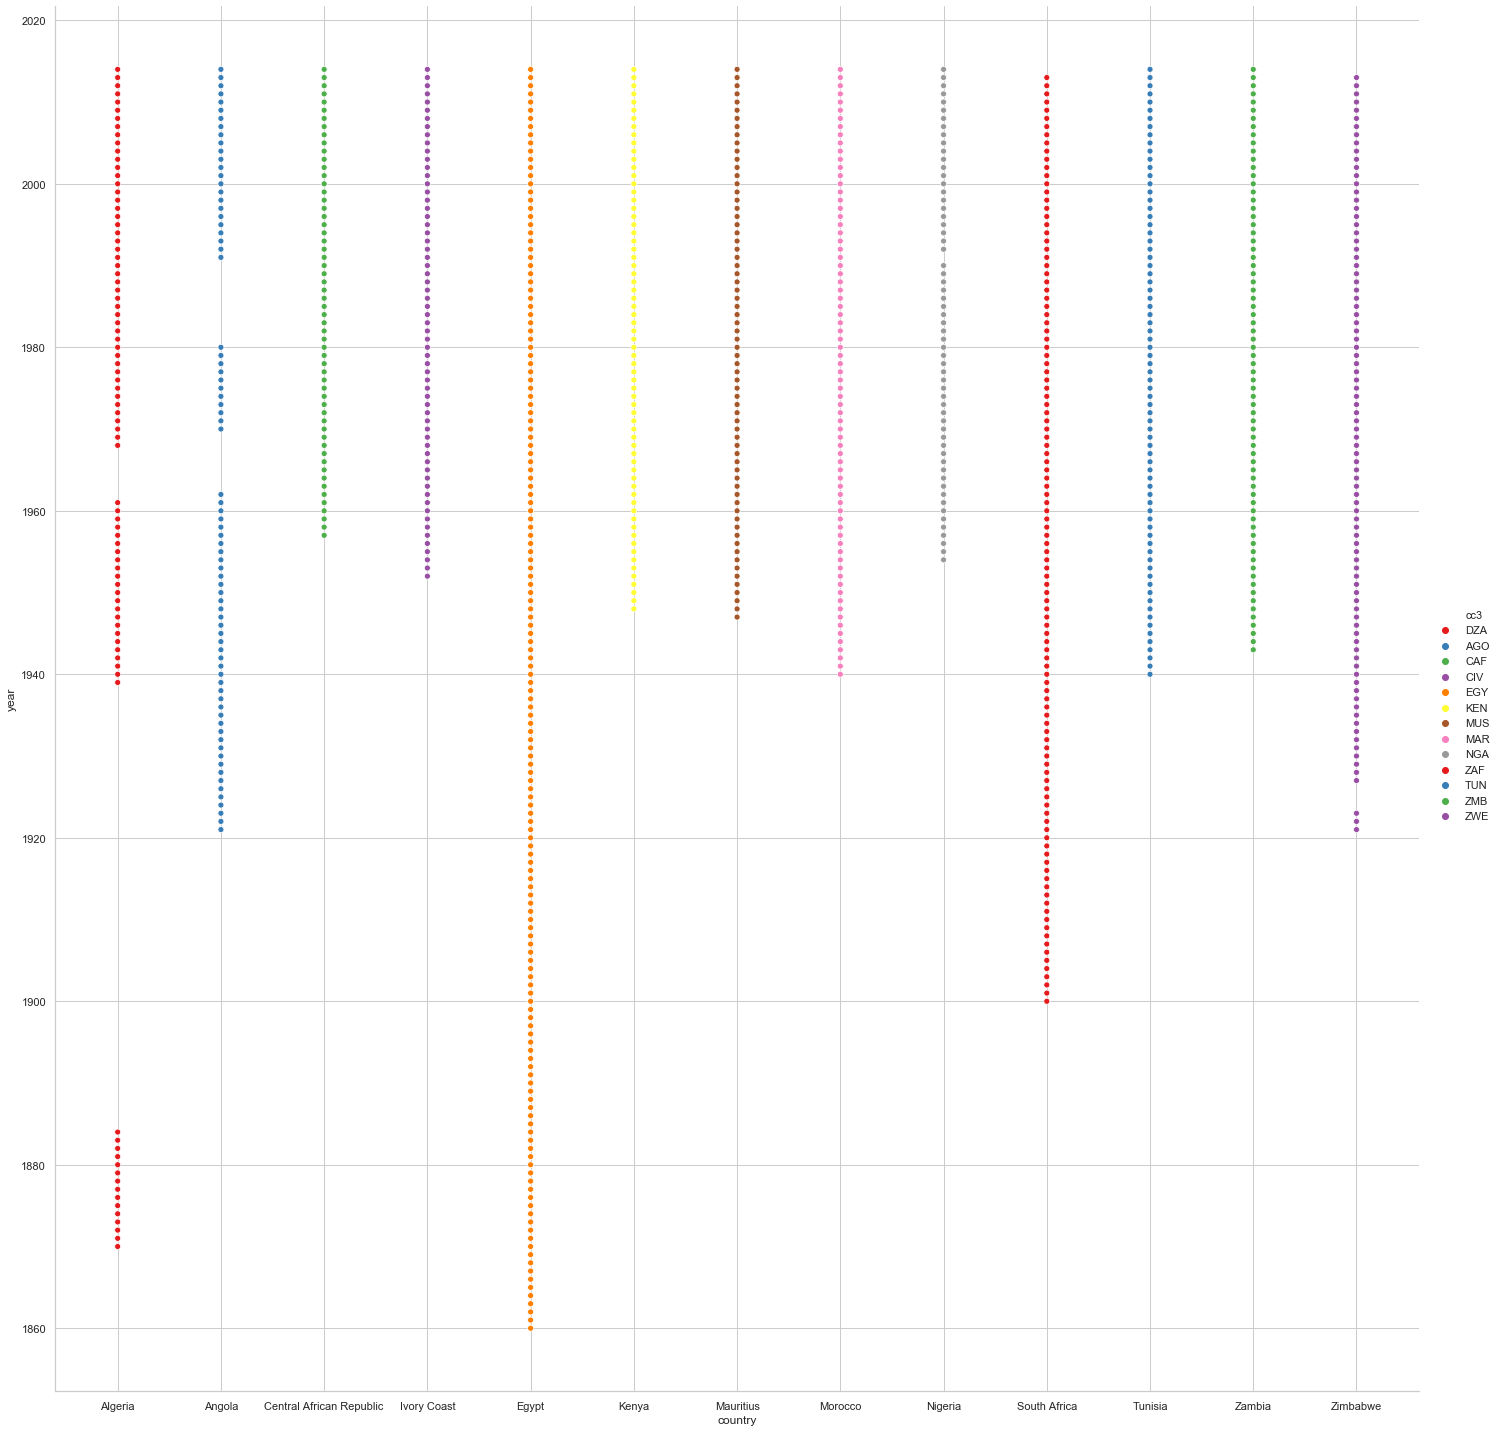

In [54]:
# Add "clarity" variable as color
sns.relplot(
            x="country",
            y="year",
            hue="cc3", # added to color axis
            data=df,
            height=20,
            palette="Set1", # change color palette 
            edgeColor=None)

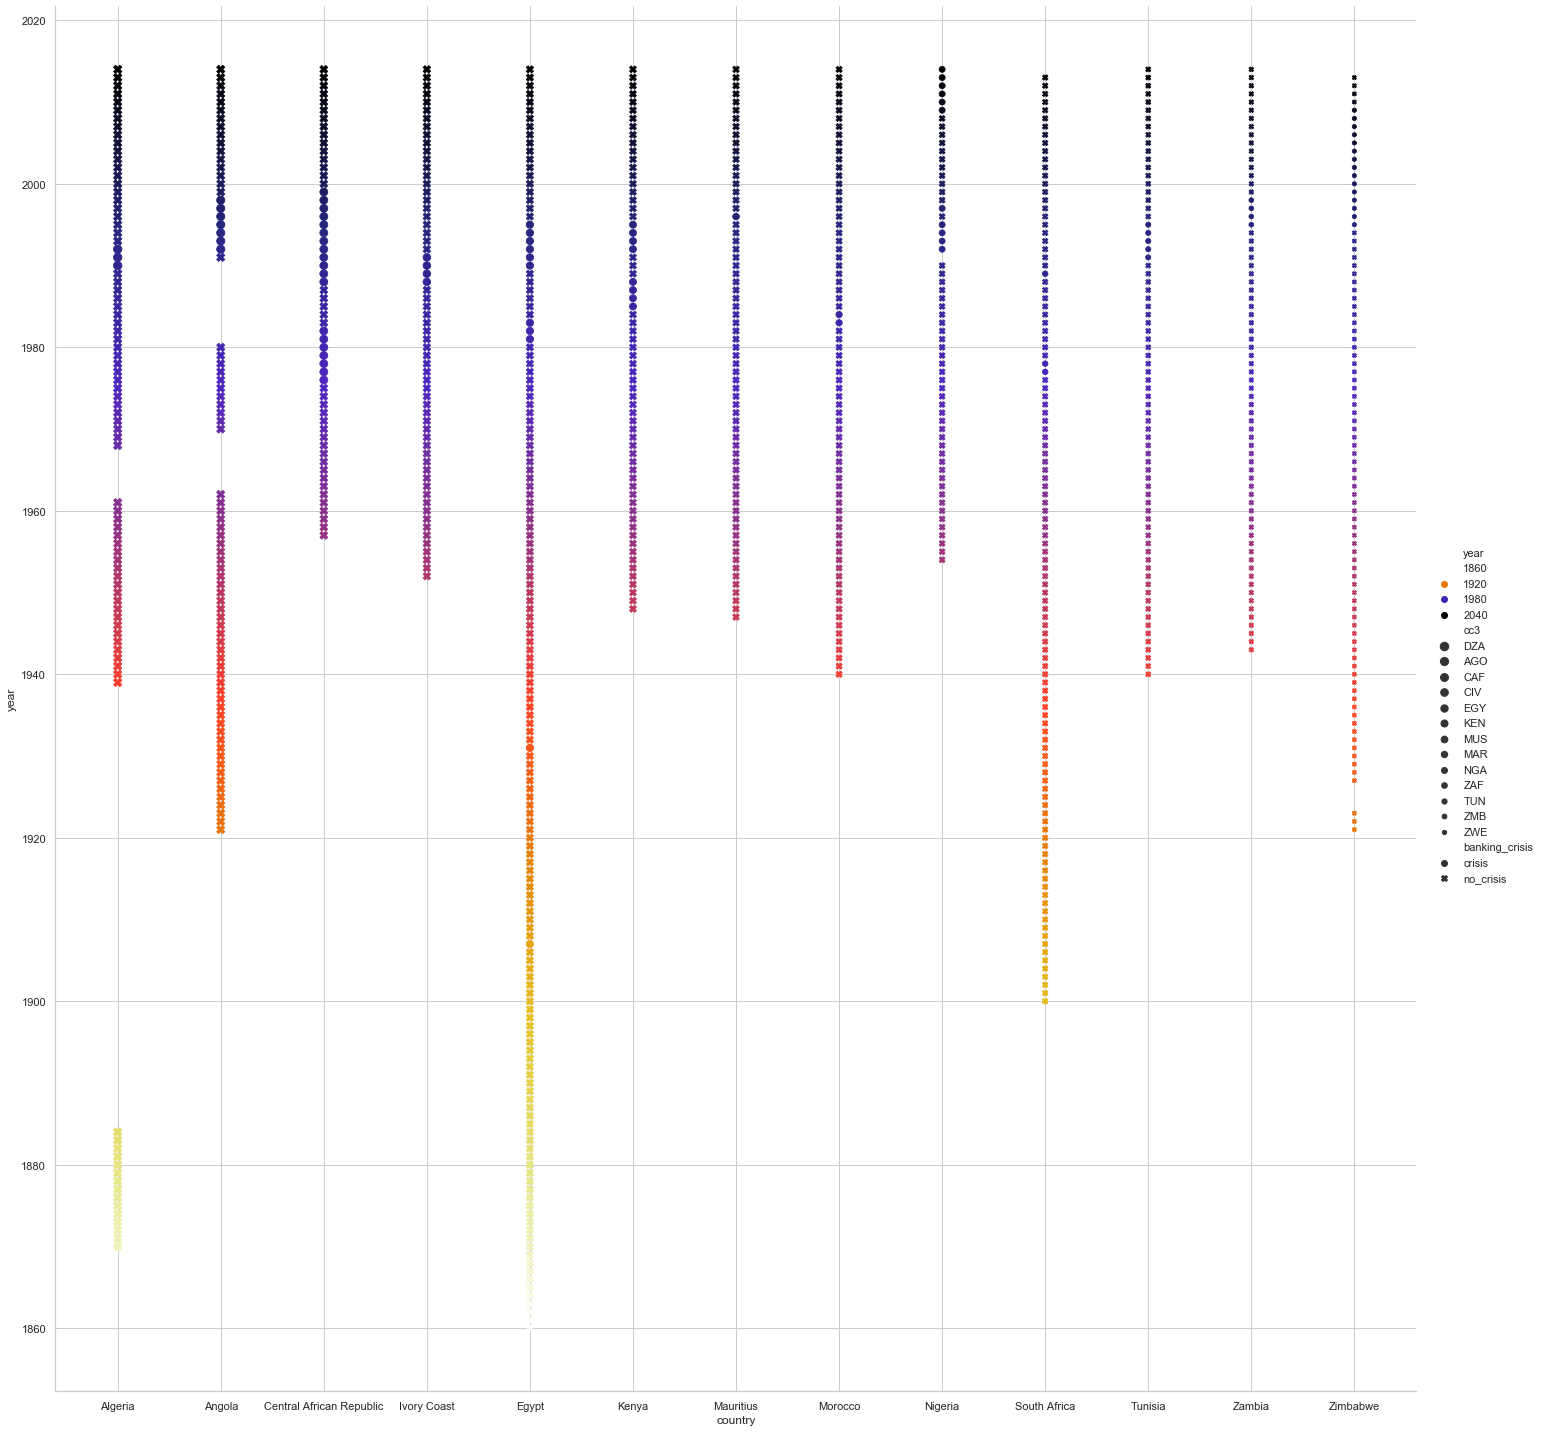

In [55]:
sns.relplot(
            x="country",
            y="year",
            hue="year",
            size="cc3",   ###
            style="banking_crisis",  ###
            data=df,
            palette="CMRmap_r",
            edgecolor=None,
            height=20)

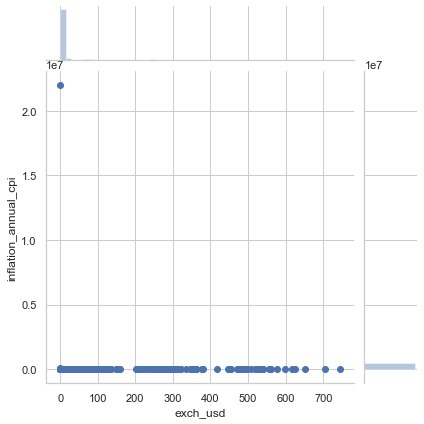

In [56]:
sns.jointplot(x="exch_usd", y="inflation_annual_cpi", data=df);

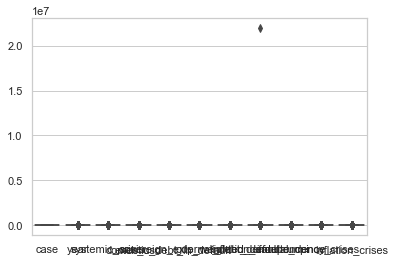

In [57]:
sns.boxplot(data=df);

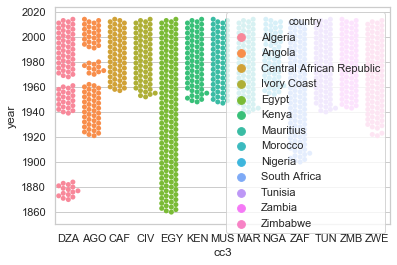

In [58]:
sns.swarmplot(x="cc3", y="year", data=df, hue="country")

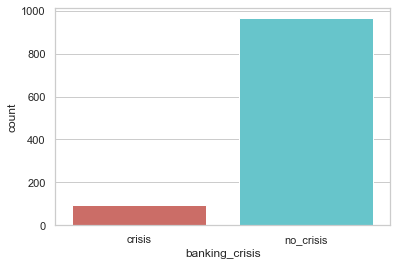

percentage of no crisis is 91.123701605288
percentage of crisis 8.876298394711993


<Figure size 432x288 with 0 Axes>

In [24]:
# Data exploration
Y.value_counts()
sns.countplot( x= Y ,data=df ,palette='hls') 
plt.show()
plt.savefig('count_plot')

## percentage of  crisis & no crisis
count_no_crisis = len(df[Y=='no_crisis'])
count_crisis = len(df[Y=='crisis'])
pct_of_no_crisis = count_no_crisis/(count_no_crisis+count_crisis)
print("percentage of no crisis is", pct_of_no_crisis*100)
pct_of_crisis = count_crisis/(count_no_crisis+count_crisis)
print("percentage of crisis", pct_of_crisis*100)

Text(0, 0.5, 'Frequency of banking crisis')

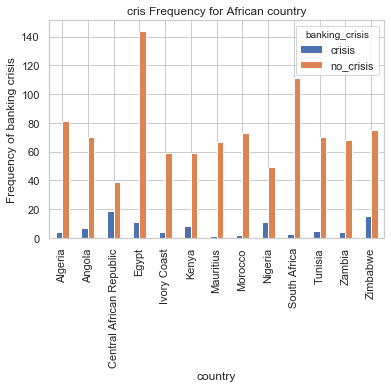

In [26]:
#More exploration 
# Visualisations 

# cris by country 
%matplotlib inline
pd.crosstab(df.country,Y).plot(kind='bar')
plt.title('cris Frequency for African country')
plt.xlabel('country')
plt.ylabel('Frequency of banking crisis')

Text(0, 0.5, 'Frequency of banking crisis')

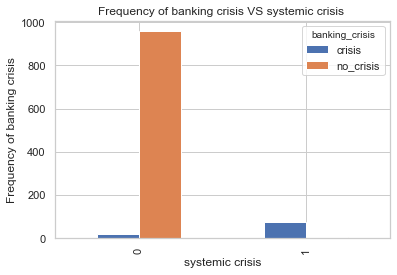

In [27]:
# visualisation for categorical variables
%matplotlib inline
pd.crosstab(df.systemic_crisis,Y).plot(kind='bar')
plt.title('Frequency of banking crisis VS systemic crisis ')
plt.xlabel('systemic crisis')
plt.ylabel('Frequency of banking crisis')

Text(0, 0.5, 'Frequency of banking crisis')

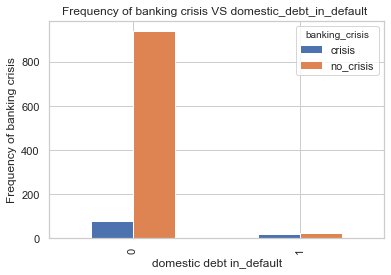

In [28]:
%matplotlib inline
pd.crosstab(df.domestic_debt_in_default,Y).plot(kind='bar')
plt.title('Frequency of banking crisis VS domestic_debt_in_default ')
plt.xlabel('domestic debt in_default')
plt.ylabel('Frequency of banking crisis')

Text(0, 0.5, 'Frequency of banking crisis')

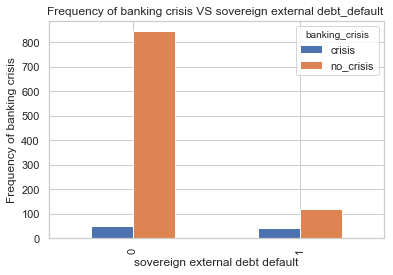

In [29]:
%matplotlib inline
pd.crosstab(df.sovereign_external_debt_default,Y).plot(kind='bar')
plt.title('Frequency of banking crisis VS sovereign external debt_default ')
plt.xlabel('sovereign external debt default')
plt.ylabel('Frequency of banking crisis')

Text(0, 0.5, 'Frequency of banking crisis')

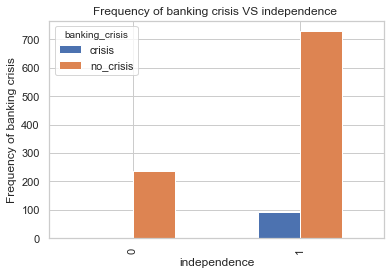

In [30]:
%matplotlib inline
pd.crosstab(df.independence,Y).plot(kind='bar')
plt.title('Frequency of banking crisis VS independence ')
plt.xlabel('independence')
plt.ylabel('Frequency of banking crisis')

Text(0, 0.5, 'Frequency of banking crisis')

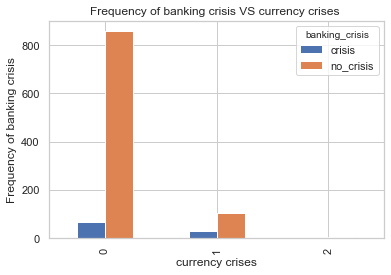

In [31]:
%matplotlib inline
pd.crosstab(df.currency_crises,Y).plot(kind='bar')
plt.title('Frequency of banking crisis VS currency crises ')
plt.xlabel('currency crises')
plt.ylabel('Frequency of banking crisis')

Text(0, 0.5, 'Frequency of banking crisis')

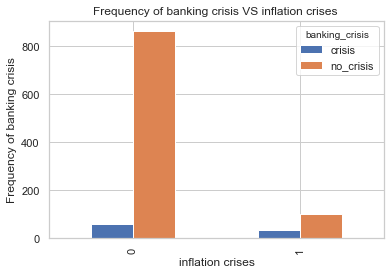

In [32]:
%matplotlib inline
pd.crosstab(df.inflation_crises,Y).plot(kind='bar')
plt.title('Frequency of banking crisis VS inflation crises ')
plt.xlabel('inflation crises')
plt.ylabel('Frequency of banking crisis')

Text(0, 0.5, 'Frequency')

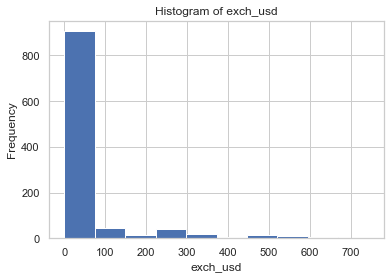

In [33]:
# numerical variables 

df.exch_usd.hist()
plt.title('Histogram of exch_usd')
plt.xlabel('exch_usd')
plt.ylabel('Frequency')

In [5]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [6]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [7]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [9]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# african_crises.csv has 1059 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('C://Users//DELL//Downloads//DATASET END TO END WORKOUT//dataset//african_crises.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'african_crises.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 14 columns


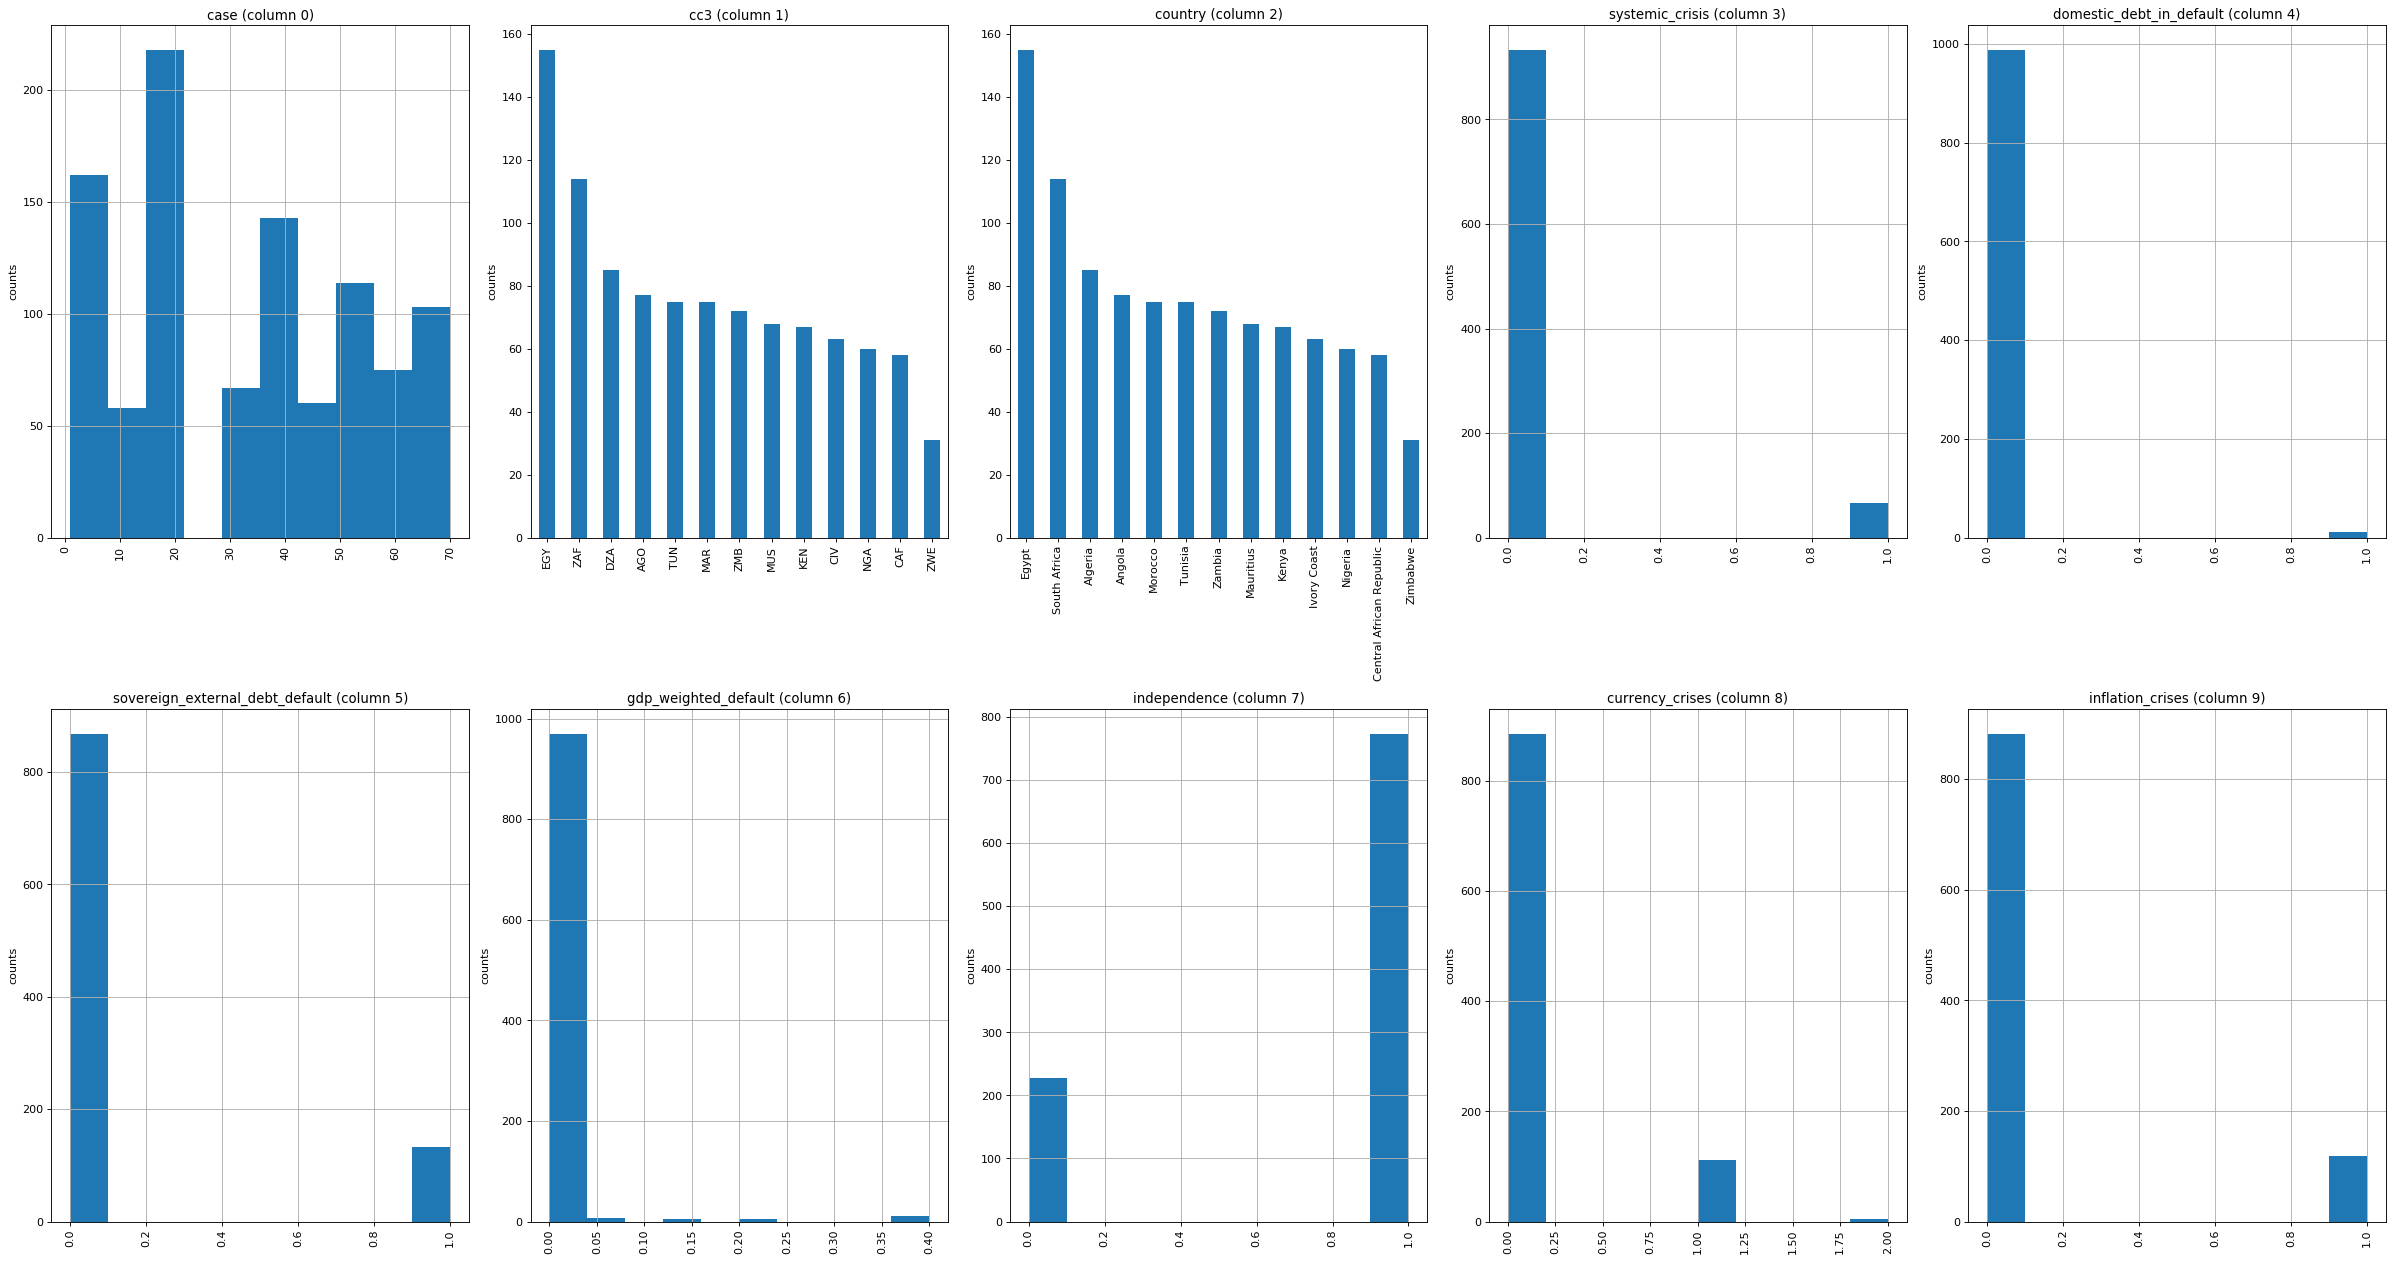

In [10]:
plotPerColumnDistribution(df1, 10, 5)

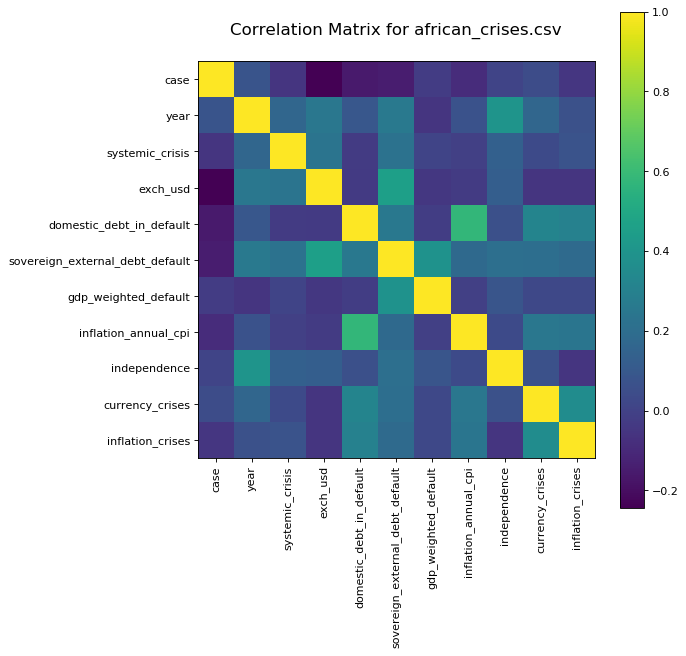

In [11]:
plotCorrelationMatrix(df1, 8)

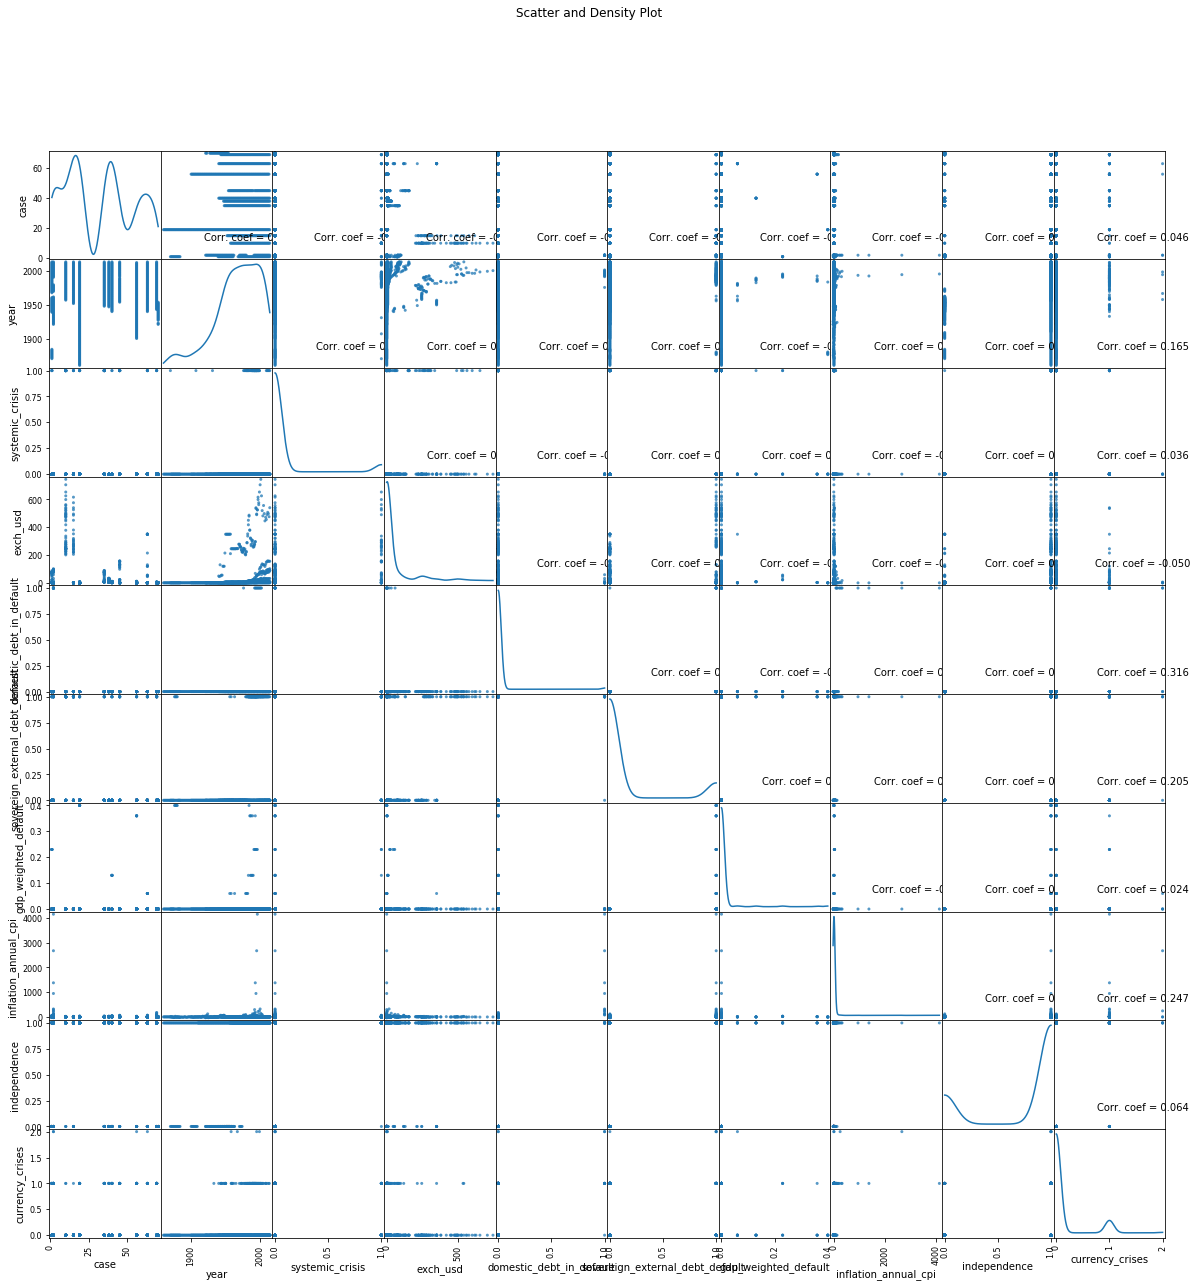

In [12]:
plotScatterMatrix(df1, 20, 10)


### Year wise average usd exchange rate of each country

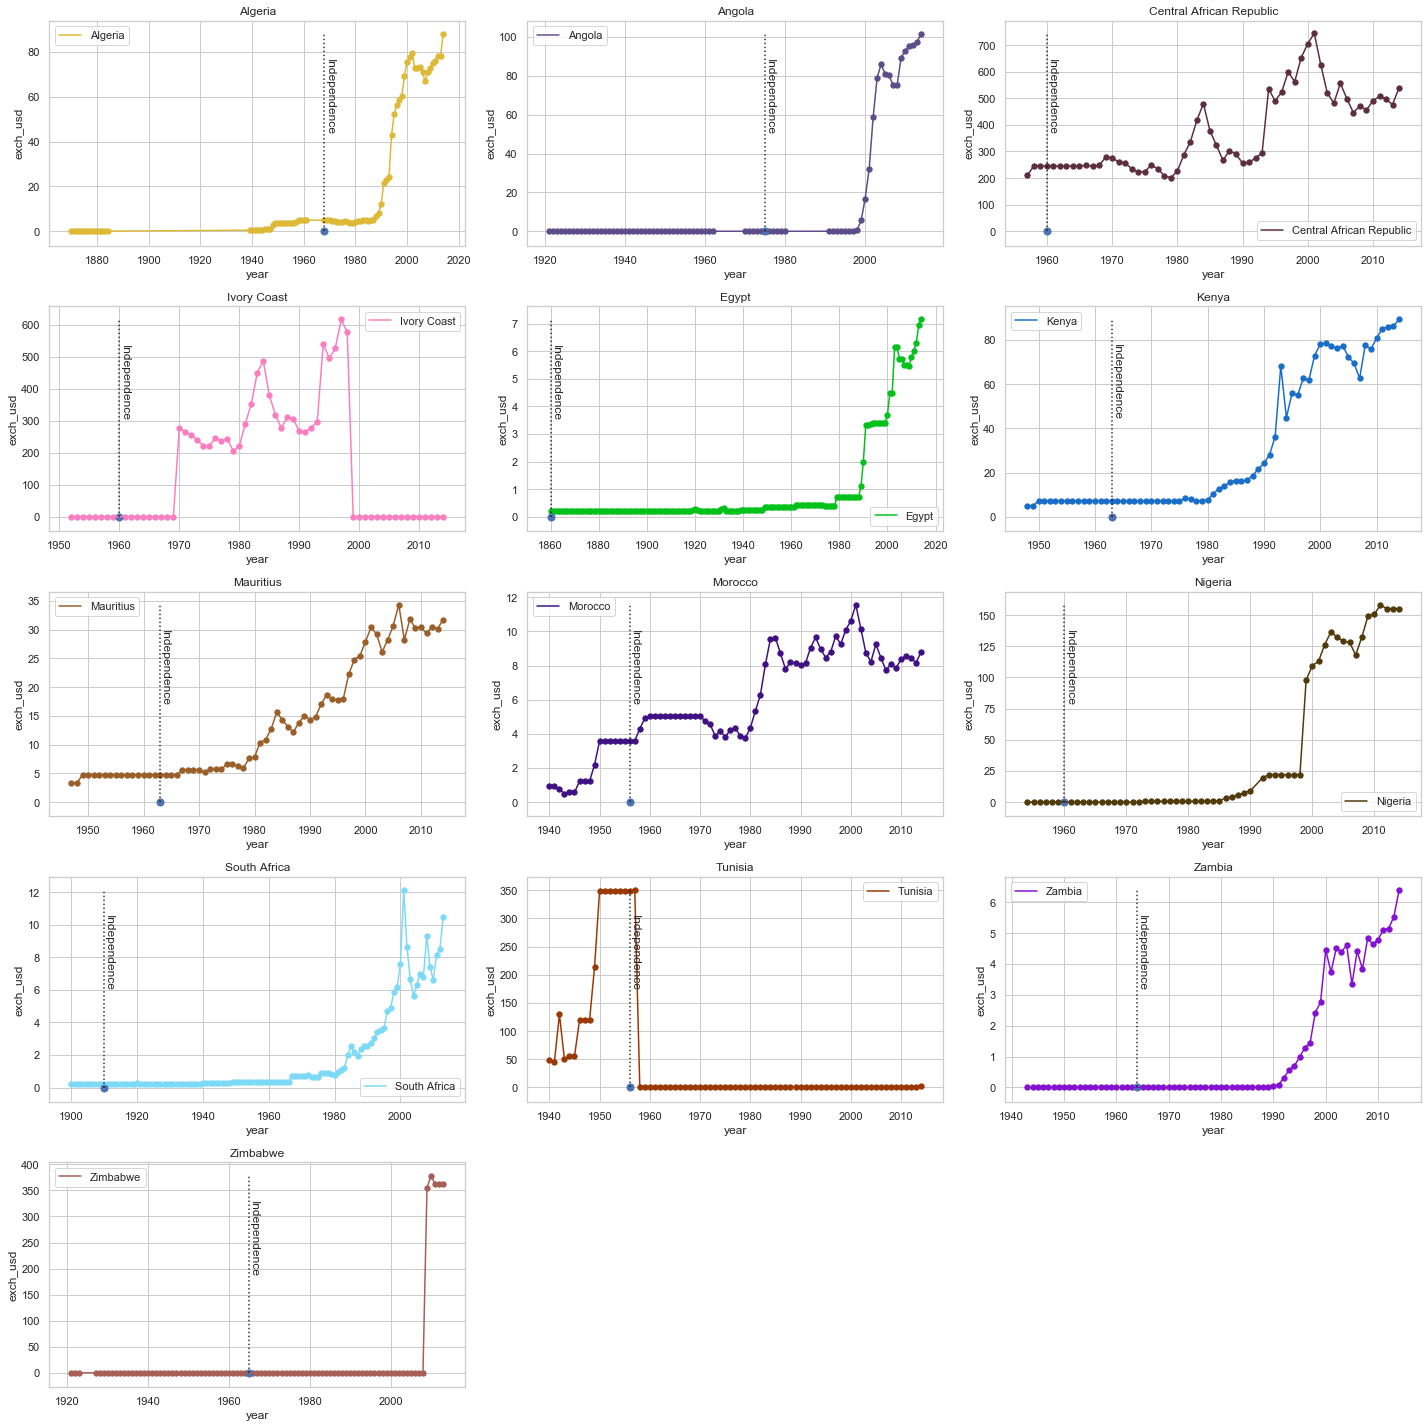

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set(style='whitegrid')
plt.figure(figsize=(20,20))
count=1
for country in unique_countries:
    plt.subplot(5,3,count)
    count+=1
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    sns.lineplot(df[df.country==country]['year'],
                 df[df.country==country]['exch_usd'],
                 label=country,
                 color=col)
    plt.scatter(df[df.country==country]['year'],
                df[df.country==country]['exch_usd'],
                color=col,
                s=28)
    plt.plot([np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
              np.min(df[np.logical_and(df.country==country,df.independence==1)]['year'])],
             [0,
              np.max(df[df.country==country]['exch_usd'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
             np.max(df[df.country==country]['exch_usd'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
                y=0,
                s=50)
    plt.title(country)
plt.tight_layout()
plt.show()

### Different debt count of each country

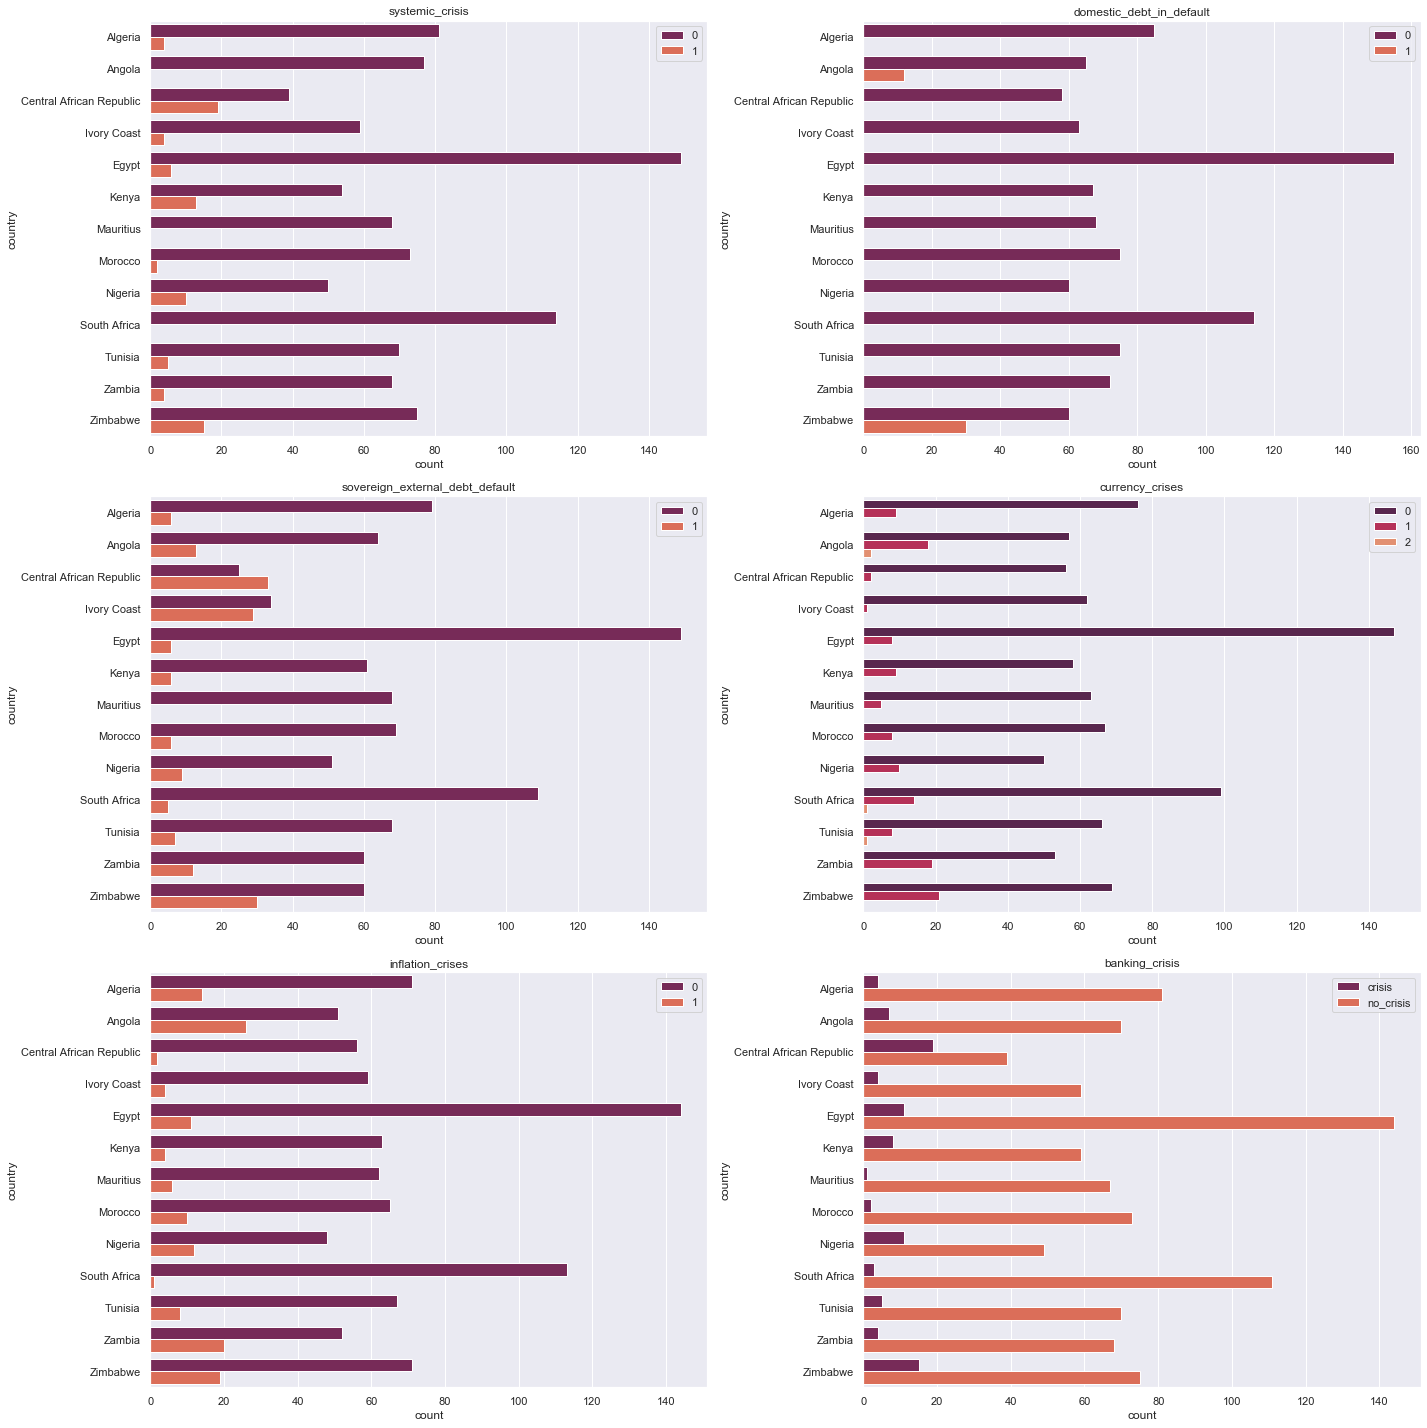

In [18]:
sns.set(style='darkgrid')
cols=['systemic_crisis','domestic_debt_in_default','sovereign_external_debt_default','currency_crises','inflation_crises','banking_crisis']
plt.figure(figsize=(20,20))
count=1
for col in cols:
    plt.subplot(3,2,count)
    count+=1
    sns.countplot(y=df.country,hue=df[col],palette='rocket')
    plt.legend(loc=0)
    plt.title(col)
plt.tight_layout()
plt.show()

### Average year wise inflation

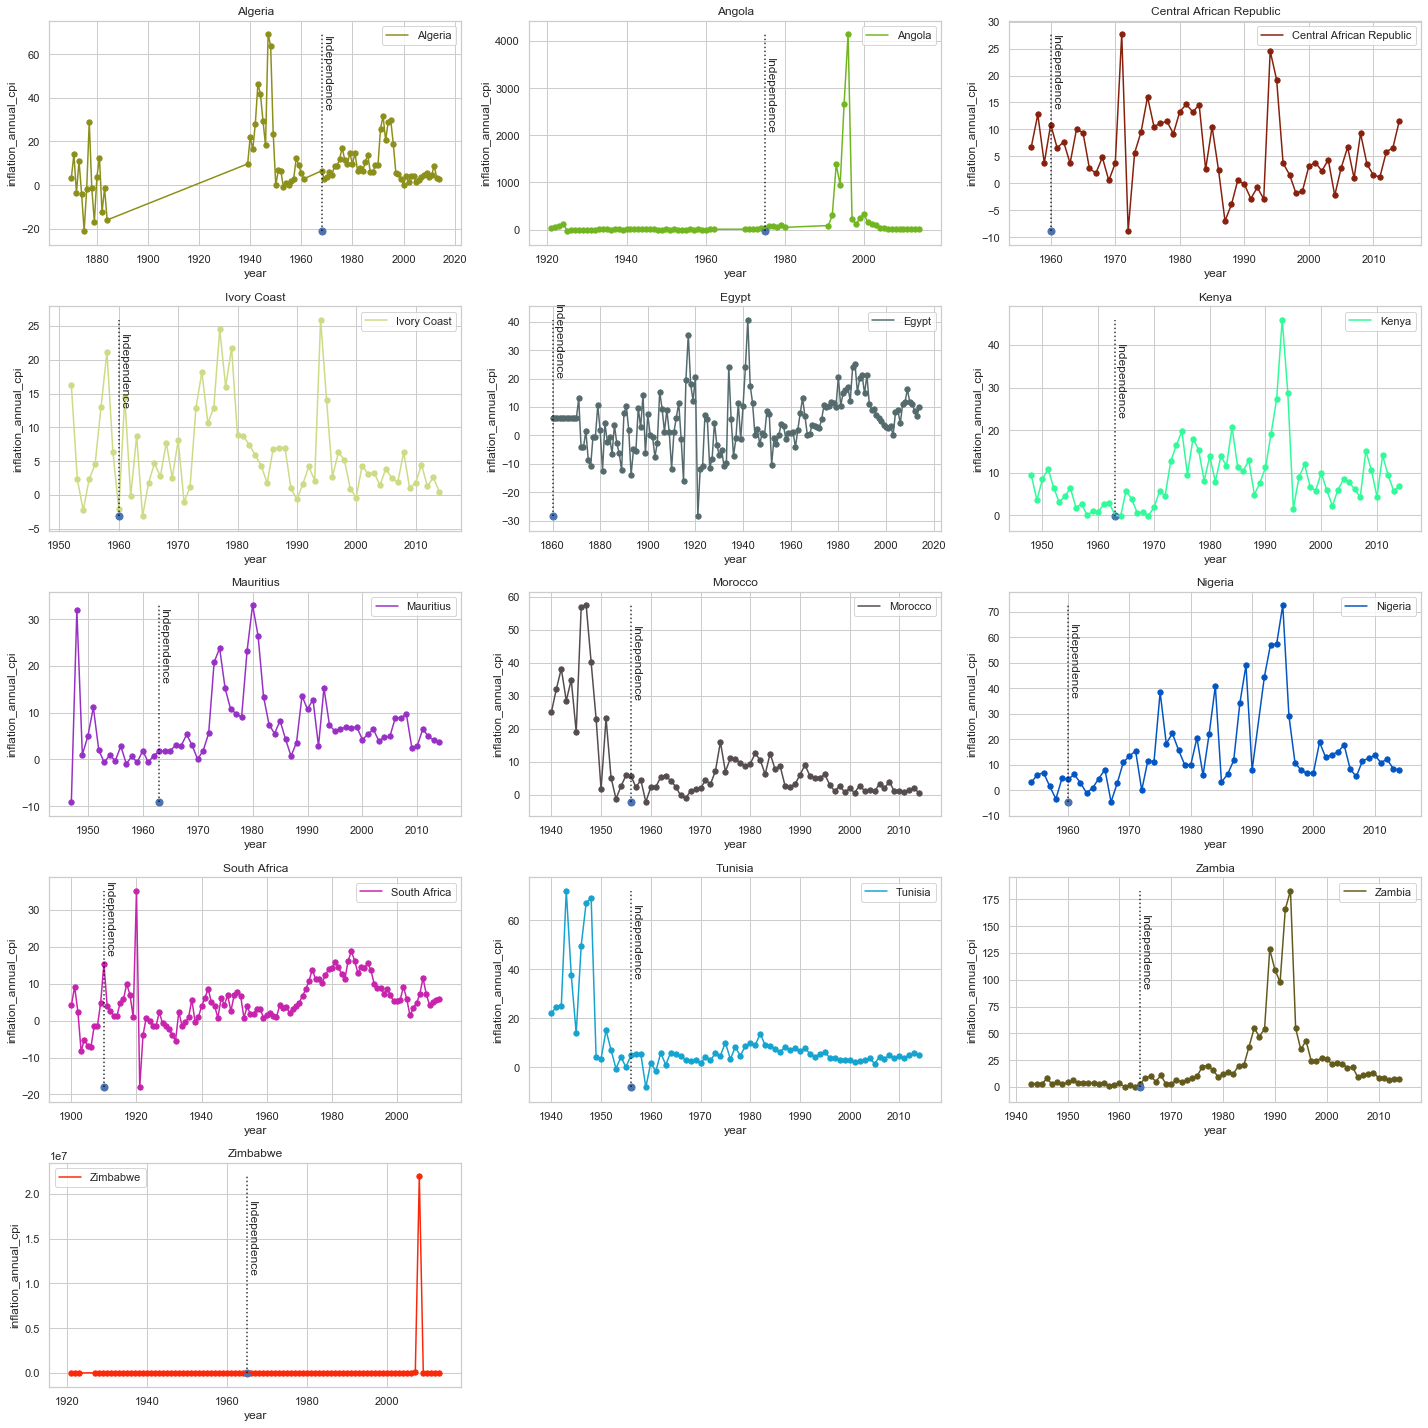

In [19]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,20))
count=1
for country in unique_countries:
    plt.subplot(5,3,count)
    count+=1
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    sns.lineplot(df[df.country==country]['year'],
                 df[df.country==country]['inflation_annual_cpi'],
                 label=country,
                 color=col)
    plt.scatter(df[df.country==country]['year'],
                df[df.country==country]['inflation_annual_cpi'],
                color=col,
                s=28)
    plt.plot([np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
              np.min(df[np.logical_and(df.country==country,df.independence==1)]['year'])],
             [np.min(df[df.country==country]['inflation_annual_cpi']),
              np.max(df[df.country==country]['inflation_annual_cpi'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
             np.max(df[df.country==country]['inflation_annual_cpi'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
                y=np.min(df[df.country==country]['inflation_annual_cpi']),
                s=50)
    plt.title(country)
plt.tight_layout()
plt.show()

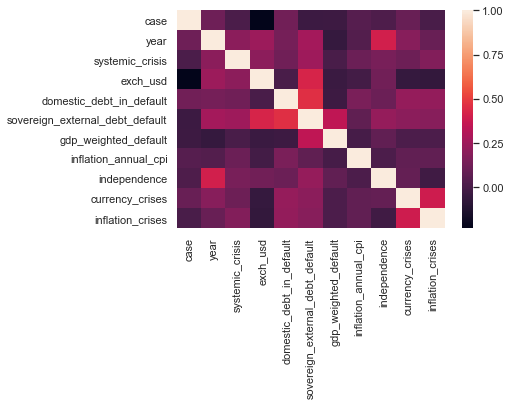

In [20]:
sns.heatmap(df.corr())

Context : This dataset is a derivative of Reinhart et. al's Global Financial Stability dataset which can be found online at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx The dataset will be valuable to those who seek to understand the dynamics of financial stability within the African context.

Content : The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe. Acknowledgements Reinhart, C., Rogoff, K., Trebesch, C. and Reinhart, V. (2019) Global Crises Data by Country. [online] https://www.hbs.edu/behavioral-finance-and-financial-stability/data. Available at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx [Accessed: 17 July 2019].

Inspiration : Which factors are most associated with Systemic Crises in Africa ?

Our next step is to divide the data into “attributes” and “labels”. X variable contains all the attributes/features and Y variable contains labels.

In [23]:
X = df[['systemic_crisis', 'exch_usd', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'gdp_weighted_default',
       'inflation_annual_cpi', 'independence', 'currency_crises',
       'inflation_crises']]



# Define the Y variable 

Y = df['banking_crisis']

In [34]:
# Our predict variable  is categorical we have to convert it to binary .
# Create dummy variables

Y= pd.get_dummies(Y)

Y = Y.drop(['no_crisis'], axis = 1) 

##### Over-sampling using SMOTE
With our training data created, I’ll up-sample the no-crisis using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE: Works by creating synthetic samples from the minor class (no-crisis) instead of creating copies. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# SMOTE 

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_Y=os.fit_sample(X_train, Y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_Y= pd.DataFrame(data=os_data_Y,columns=['Y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no crisis in oversampled data",len(os_data_Y[os_data_Y['Y']==0]))
print("Number of crisis",len(os_data_Y[os_data_Y['Y']==1]))
print("Proportion of no crisis data in oversampled data is ",len(os_data_Y[os_data_Y['Y']==0])/len(os_data_X))
print("Proportion of crisis data in oversampled data is ",len(os_data_Y[os_data_Y['Y']==1])/len(os_data_X))

length of oversampled data is  1360
Number of no crisis in oversampled data 680
Number of crisis 680
Proportion of no crisis data in oversampled data is  0.5
Proportion of crisis data in oversampled data is  0.5


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_Y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Implementing the model

In [41]:

import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 19
                                 Results: Logit
Model:                     Logit                  Pseudo R-squared:       inf   
Dependent Variable:        crisis                 AIC:                    inf   
Date:                      2019-10-15 08:56       BIC:                    inf   
No. Observations:          1059                   Log-Likelihood:         -inf  
Df Model:                  8                      LL-Null:                0.0000
Df Residuals:              1050                   LLR p-value:            1.0000
Converged:                 1.0000                 Scale:                  1.0000
No. Iterations:            19.0000                                              
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them

In [42]:
cols=['systemic_crisis' , 'exch_usd' , 'domestic_debt_in_default' ,'independence' , 'inflation_crises'] 
X=os_data_X[cols]
Y=os_data_Y['Y']
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 11
                             Results: Logit
Model:                  Logit                Pseudo R-squared:     inf   
Dependent Variable:     Y                    AIC:                  inf   
Date:                   2019-10-15 08:57     BIC:                  inf   
No. Observations:       1360                 Log-Likelihood:       -inf  
Df Model:               4                    LL-Null:              0.0000
Df Residuals:           1355                 LLR p-value:          1.0000
Converged:              1.0000               Scale:                1.0000
No. Iterations:         11.0000                                          
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
systemic_crisis          17.0516   1.9544   

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


The p-values for 'domestic_debt_in_default' and 'inflation_crises' variables are greater than 0.05, therefore, we will remove them

In [43]:
cols=['systemic_crisis' , 'exch_usd'  ,'independence' ] 
X=os_data_X[cols]
Y=os_data_Y['Y']
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 11
                         Results: Logit
Model:               Logit             Pseudo R-squared:  inf   
Dependent Variable:  Y                 AIC:               inf   
Date:                2019-10-15 08:58  BIC:               inf   
No. Observations:    1360              Log-Likelihood:    -inf  
Df Model:            2                 LL-Null:           0.0000
Df Residuals:        1357              LLR p-value:       1.0000
Converged:           1.0000            Scale:             1.0000
No. Iterations:      11.0000                                    
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
systemic_crisis 17.2624   1.9530   8.8391 0.0000 13.4347 21.0901
exch_usd        -0.0223   0.0041  -5.4584 0.0000 -0.0303 -0.0143
independence    -

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


## Logistic Regression Model Fitting

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# Predicting the test set results and calculating the accuracy
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.95


## Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[205   0]
 [ 22 181]]


## ROC Curve

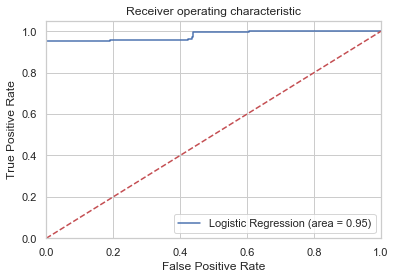

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Conclusion :¶
Our result indicate that Systemic crises in Africa is significantly correleted with three factors :

systemic_crisis
exch_usd
independence

a simple neural network to predict whether or not a banking crisis will occur in a given country in a given year. Although the network is simple, it is over 90% accurate in its predictions, and does not tend to severly under-predict banking crises (note the confusion matrix).

In [60]:
!pip install keras

In [62]:
! pip install tensorflow

  Stored in directory: C:\Users\DELL\AppData\Local\pip\Cache\wheels\2c\b1\94\43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833
  Stored in directory: C:\Users\DELL\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\DELL\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: C:\Users\DELL\AppData\Local\pip\Cache\wheels\a7\15\a0\0a0561549ad11cdc1bc8fa1191a353efd30facf6bfb507aefc
Successfully built opt-einsum gast termcolor absl-py


In [63]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [64]:
df = pd.read_csv("C://Users//DELL//Downloads//DATASET END TO END WORKOUT//dataset//african_crises.csv")

In [65]:
# converting into useful numbers

df['banking_crisis'] = df['banking_crisis'].replace('crisis',np.nan)
df['banking_crisis'] = df['banking_crisis'].fillna(1)
df['banking_crisis'] = df['banking_crisis'].replace('no_crisis',np.nan)
df['banking_crisis'] = df['banking_crisis'].fillna(0)

# removing unneccesary data

df.drop(['cc3','country'], axis=1, inplace=True)

In [66]:
# scaling the data

df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['banking_crisis'] = df['banking_crisis']
df = df_scaled

In [67]:
# defining the input data, X, and the desired results, y 

X = df.loc[:,df.columns != 'banking_crisis']
y = df.loc[:, 'banking_crisis']

# breaking data into training data, validation data, and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2)

In [68]:
# constructing a simple Multilayer Perceptron

model = Sequential()
model.add(Dense(32,activation = 'relu', input_dim = 11))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [69]:
# training the network

model.fit(X_train, y_train, epochs=200)

Epoch 1/200
677/677 [==============================] - 0s 403us/step - loss: 0.8180 - accuracy: 0.4328
Epoch 2/200
677/677 [==============================] - 0s 63us/step - loss: 0.5773 - accuracy: 0.7917
Epoch 3/200
677/677 [==============================] - 0s 96us/step - loss: 0.4424 - accuracy: 0.9114
Epoch 4/200
677/677 [==============================] - 0s 63us/step - loss: 0.3382 - accuracy: 0.9217
Epoch 5/200
677/677 [==============================] - 0s 78us/step - loss: 0.2561 - accuracy: 0.9232
Epoch 6/200
677/677 [==============================] - 0s 94us/step - loss: 0.2005 - accuracy: 0.9276
Epoch 7/200
677/677 [==============================] - 0s 90us/step - loss: 0.1616 - accuracy: 0.9483
Epoch 8/200
677/677 [==============================] - 0s 99us/step - loss: 0.1317 - accuracy: 0.9572
Epoch 9/200
677/677 [==============================] - 0s 83us/step - loss: 0.1092 - accuracy: 0.9764
Epoch 10/200
677/677 [==============================] - 0s 89us/step - loss: 0.09

677/677 [==============================] - 0s 80us/step - loss: 0.0330 - accuracy: 0.9897
Epoch 81/200
677/677 [==============================] - 0s 80us/step - loss: 0.0330 - accuracy: 0.9897
Epoch 82/200
677/677 [==============================] - 0s 80us/step - loss: 0.0331 - accuracy: 0.9897
Epoch 83/200
677/677 [==============================] - 0s 86us/step - loss: 0.0338 - accuracy: 0.9897
Epoch 84/200
677/677 [==============================] - 0s 78us/step - loss: 0.0332 - accuracy: 0.9897
Epoch 85/200
677/677 [==============================] - 0s 83us/step - loss: 0.0325 - accuracy: 0.9897
Epoch 86/200
677/677 [==============================] - 0s 78us/step - loss: 0.0322 - accuracy: 0.9897
Epoch 87/200
677/677 [==============================] - 0s 80us/step - loss: 0.0326 - accuracy: 0.9897
Epoch 88/200
677/677 [==============================] - 0s 78us/step - loss: 0.0319 - accuracy: 0.9897
Epoch 89/200
677/677 [==============================] - 0s 94us/step - loss: 0.0323 - 

677/677 [==============================] - 0s 77us/step - loss: 0.0264 - accuracy: 0.9897
Epoch 160/200
677/677 [==============================] - 0s 92us/step - loss: 0.0256 - accuracy: 0.9911
Epoch 161/200
677/677 [==============================] - 0s 90us/step - loss: 0.0257 - accuracy: 0.9911
Epoch 162/200
677/677 [==============================] - 0s 80us/step - loss: 0.0255 - accuracy: 0.9911
Epoch 163/200
677/677 [==============================] - 0s 92us/step - loss: 0.0258 - accuracy: 0.9911
Epoch 164/200
677/677 [==============================] - 0s 103us/step - loss: 0.0257 - accuracy: 0.9911
Epoch 165/200
677/677 [==============================] - 0s 84us/step - loss: 0.0260 - accuracy: 0.9911
Epoch 166/200
677/677 [==============================] - 0s 78us/step - loss: 0.0254 - accuracy: 0.9911
Epoch 167/200
677/677 [==============================] - 0s 92us/step - loss: 0.0263 - accuracy: 0.9911
Epoch 168/200
677/677 [==============================] - 0s 90us/step - loss:

In [70]:
# scoring it on the data it trained on as well as test data

scores = model.evaluate(X_train, y_train)
print ("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print ("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

677/677 [==============================] - 0s 83us/step
Training Accuracy: 99.11%

212/212 [==============================] - 0s 52us/step
Testing Accuracy: 96.70%



Text(30.499999999999993, 0.5, 'Actual')

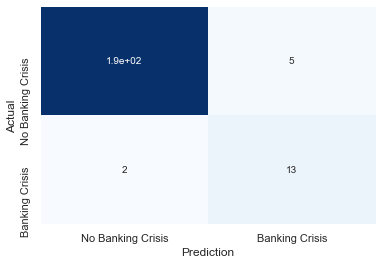

In [71]:
# plotting the confusion matrix

y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test,y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Banking Crisis','Banking Crisis'], yticklabels=['No Banking Crisis','Banking Crisis'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

In [73]:
df = pd.read_csv("C://Users//DELL//Downloads//DATASET END TO END WORKOUT//dataset//african_crises.csv")

In [74]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["banking_crisis"] = le.fit_transform(df["banking_crisis"])
df["banking_crisis"] = df["banking_crisis"].astype("category") 

df["cc3"] = le.fit_transform(df["cc3"])
df["cc3"] = df["cc3"].astype("category") 

df["country"] = le.fit_transform(df["country"])
df["country"] = df["country"].astype("category")

x = df.values[: , 0:13]
y = df["banking_crisis"]

In [76]:
print(x.shape)
print(df.shape)

(1059, 13)
(1059, 14)


In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix

xtrain,xtest,ytrain,ytest = train_test_split(x, y,test_size=0.2)
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(xtrain,ytrain)
#Predict the response for test dataset
y_pred = clf.predict(xtest)
acc1 = metrics.accuracy_score(ytest, y_pred)
matrix=confusion_matrix(ytest,y_pred)

In [78]:
matrix

array([[ 15,   3],
       [  6, 188]], dtype=int64)

In [79]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(xtrain,ytrain)
y_pred2=clf.predict(xtest)
acc2 = metrics.accuracy_score(ytest, y_pred2)
matrix2=confusion_matrix(ytest,y_pred2)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [80]:
acc2

0.9858490566037735

##### other way

In [84]:
from sklearn.metrics import accuracy_score
# Import the Random Forest Classifier from Sklearn

from sklearn.ensemble import RandomForestClassifier

In [85]:
# The class_weight Parameter is Set to "balanced" to Account for the Class Imbalance

ensemble = RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini',
                                  max_depth=100, max_features='auto', max_leaf_nodes=10,
                                  min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=1, min_samples_split=2,
                                  min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
                                  oob_score=False, random_state=0, verbose=0, warm_start=False)

In [88]:
## Define X and Y Variables

# Define Features: Ignore the 'case', 'cc3', 'country', 'year' variables

X = df[['systemic_crisis', 'exch_usd', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'gdp_weighted_default',
       'inflation_annual_cpi', 'independence', 'currency_crises',
       'inflation_crises']]


# Define the Y variable 

Y = df['banking_crisis']

In [89]:
train_features, val_features, train_targets, val_targets = train_test_split(X, Y, 
                                                                            test_size=0.30, 
                                                                            random_state=7)

In [90]:
# Fit the Model to the Training Set and Test Set

ensemble.fit(train_features, train_targets)

predicted = ensemble.predict(val_features)

In [91]:
# Print Accuracy Score

print('Accuracy achieved is: ' + str(np.mean(predicted == val_targets)))
print(metrics.classification_report(val_targets, predicted, target_names=("crisis", "no_crisis"))),
metrics.confusion_matrix(val_targets, predicted)

Accuracy achieved is: 0.9779874213836478
              precision    recall  f1-score   support

      crisis       0.82      0.92      0.87        25
   no_crisis       0.99      0.98      0.99       293

    accuracy                           0.98       318
   macro avg       0.91      0.95      0.93       318
weighted avg       0.98      0.98      0.98       318



array([[ 23,   2],
       [  5, 288]], dtype=int64)

### Understand the Inner Workings of the Model Using LIME Framework

In [ ]:
! pip install lime

In [ ]:
# Step 1: Import the Modules for Model Interpretability

import lime
import lime.lime_tabular

In [ ]:
# Step 2: Define Feature Names

feature_names = ['systemic_crisis', 'exch_usd', 'domestic_debt_in_default',
                 'sovereign_external_debt_default', 'gdp_weighted_default',
                 'inflation_annual_cpi', 'independence', 'currency_crises', 
                 'inflation_crises']

In [ ]:
# Step 3: Define Class Names

class_names = Y.unique()

In [ ]:
# Step 4: Change the Features in the Training Set to a Numpy Array

train_features.values

In [ ]:
# Step 5: Create Your Explainer

explainer = lime.lime_tabular.LimeTabularExplainer(train_features.values, 
                                                   feature_names=feature_names,
                                                   class_names=class_names,
                                                   discretize_continuous=True)

In [ ]:
# Step 6: Pick a Set of Features and Target Name to Explain

val_features.iloc[136], val_targets.iloc[136]

In [ ]:
# Step 7: Build The Explainer Instance

exp = explainer.explain_instance(val_features.iloc[136], ensemble.predict_proba, num_features=9, top_labels=1)

In [ ]:
exp

In [ ]:
# Step 9: Show Explanation of In [17] in Notebook

exp.show_in_notebook(show_table=True, show_all=False)